In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import os, math
import matplotlib.pyplot as plt
import imageio

In [2]:
#nos dirigimos al sitio del formato
img = imageio.imread("../Figures/PiperCompleto.png")

In [3]:
#importamos los datos
datosQuimica = pd.read_excel('../Xls/HatariChem_FormatodeTrabajo2.xlsx')
# http://www.coalgeology.com/alkalinity-as-of-caco3-to-as-of-hco3-practical-guide-on-unit-conversion/34/
# converted Alkalinity (weak acid) to bicarbonate by multiplying by 1.22
# https://www.waterboards.ca.gov/drinking_water/certlic/drinkingwater/documents/drinkingwaterlabs/AlkalinityConversions.pdf
# convertered Alkalinity (weak acid) to carbonate by multiplying by 0.6

#quitamos los caracteres que producen error
datosQuimica['Estacion'] = datosQuimica['Estacion'].str.replace("/","_")
datosQuimica['Estacion'] = datosQuimica['Estacion'].str.replace("–","-")
datosQuimica['Estacion'] = datosQuimica['Estacion'].str.replace(" |%/s","")
datosQuimica = datosQuimica.set_index(['Estacion'])

datosQuimica.head()

,Este,Norte,Cuenca,Fecha,HCO3,CO3,SO4,Cl,Na,Ca,Mg,K
Estacion,,,,,,,,,,,,
Soil,NaN,NaN,NaN,NaN,60.756,29.88,1.1097,1.9066,6.6354,10.2130,1.9632,2.8509
Soil,NaN,NaN,NaN,NaN,5.612,2.76,0.5491,2.1188,2.2770,1.8345,0.3092,0.4472
Spring,NaN,NaN,NaN,NaN,39.406,19.38,0.6696,1.9226,5.9070,6.0151,1.0611,2.4412
Downstream,NaN,NaN,NaN,NaN,54.290,26.70,0.8957,2.0262,6.2279,9.0362,1.8277,2.8911
Downstream,NaN,NaN,NaN,NaN,56.730,27.90,0.8891,1.9715,6.8140,9.3600,1.8850,3.1311


In [4]:
#diccionario de iones
iones = {
'HCO3': 61, 'CO3' : 30, 'Cl' : 35, 'SO4': 48,
'Na' : 23, 'Ca' : 20, 'Mg' : 12, 'K'  : 39
}

#generamos las columnas de concentraciones equivalentes
for ion in iones.keys():
    datosQuimica[str(ion)+'_meq'] = datosQuimica[ion]/iones[ion]
    
datosQuimica.head()

,Este,Norte,Cuenca,Fecha,HCO3,CO3,SO4,Cl,Na,Ca,Mg,K,HCO3_meq,CO3_meq,Cl_meq,SO4_meq,Na_meq,Ca_meq,Mg_meq,K_meq
Estacion,,,,,,,,,,,,,,,,,,,,
Soil,NaN,NaN,NaN,NaN,60.756,29.88,1.1097,1.9066,6.6354,10.2130,1.9632,2.8509,0.996,0.996,0.054474,0.023119,0.288496,0.510650,0.163600,0.073100
Soil,NaN,NaN,NaN,NaN,5.612,2.76,0.5491,2.1188,2.2770,1.8345,0.3092,0.4472,0.092,0.092,0.060537,0.011440,0.099000,0.091725,0.025767,0.011467
Spring,NaN,NaN,NaN,NaN,39.406,19.38,0.6696,1.9226,5.9070,6.0151,1.0611,2.4412,0.646,0.646,0.054931,0.013950,0.256826,0.300755,0.088425,0.062595
Downstream,NaN,NaN,NaN,NaN,54.290,26.70,0.8957,2.0262,6.2279,9.0362,1.8277,2.8911,0.890,0.890,0.057891,0.018660,0.270778,0.451810,0.152308,0.074131
Downstream,NaN,NaN,NaN,NaN,56.730,27.90,0.8891,1.9715,6.8140,9.3600,1.8850,3.1311,0.930,0.930,0.056329,0.018523,0.296261,0.468000,0.157083,0.080285


In [5]:
#normalizamos los aniones
datosQuimica['SO4_norm'] = datosQuimica['SO4_meq'] / (datosQuimica['SO4_meq'] +
                            datosQuimica['HCO3_meq']+datosQuimica['CO3_meq']+datosQuimica['Cl_meq']) * 100
datosQuimica['HCO3_CO3_norm'] = (datosQuimica['HCO3_meq'] + datosQuimica['CO3_meq']) / (datosQuimica['SO4_meq'] +
                            datosQuimica['HCO3_meq']+datosQuimica['CO3_meq']+datosQuimica['Cl_meq']) * 100
datosQuimica['Cl_norm'] = datosQuimica['Cl_meq'] / (datosQuimica['SO4_meq'] +
                            datosQuimica['HCO3_meq']+datosQuimica['CO3_meq']+datosQuimica['Cl_meq']) * 100

#normalizamos los cationes
datosQuimica['Mg_norm'] = datosQuimica['Mg_meq'] / (datosQuimica['Mg_meq'] +
                            datosQuimica['Ca_meq']+datosQuimica['K_meq']+datosQuimica['Na_meq']) * 100
datosQuimica['Na_K_norm'] = (datosQuimica['K_meq']+datosQuimica['Na_meq']) / (datosQuimica['Mg_meq'] +
                            datosQuimica['Ca_meq']+datosQuimica['K_meq']+datosQuimica['Na_meq']) * 100
datosQuimica['Ca_norm'] = datosQuimica['Ca_meq'] / (datosQuimica['Mg_meq'] +
                            datosQuimica['Ca_meq']+datosQuimica['K_meq']+datosQuimica['Na_meq']) * 100


In [6]:
#funcion de las coordenadas
def coordenada(Ca,Mg,Cl,SO4,Label):
    xcation = 40 + 360 - (Ca + Mg / 2) * 3.6
    ycation = 40 + (math.sqrt(3) * Mg / 2)* 3.6
    xanion = 40 + 360 + 100 + (Cl + SO4 / 2) * 3.6
    yanion = 40 + (SO4 * math.sqrt(3) / 2)* 3.6
    xdiam = 0.5 * (xcation + xanion + (yanion - ycation) / math.sqrt(3))
    ydiam = 0.5 * (yanion + ycation + math.sqrt(3) * (xanion - xcation))
    #print(str(xanion) + ' ' + str(yanion))
    c=np.random.rand(3,1).ravel()
    listagraph=[]
    listagraph.append(plt.scatter(xcation,ycation,zorder=1,c=c, s=60, edgecolors='#4b4b4b',label=Label))
    listagraph.append(plt.scatter(xanion,yanion,zorder=1,c=c, s=60, edgecolors='#4b4b4b'))
    listagraph.append(plt.scatter(xdiam,ydiam,zorder=1,c=c, s=60, edgecolors='#4b4b4b'))
    return listagraph

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

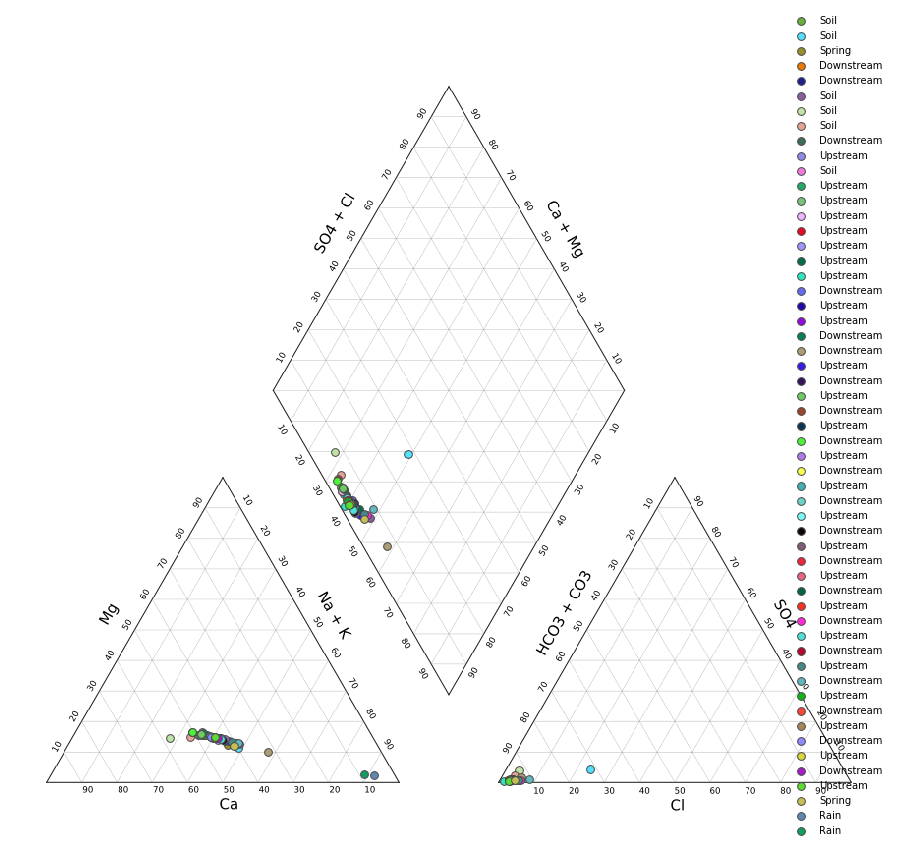

In [7]:
plt.figure(figsize=(20,15))
plt.imshow(np.flipud(img),zorder=0)
for index, row in datosQuimica.iterrows():
    coordenada(row['Ca_norm'],row['Mg_norm'],row['Cl_norm'],row['SO4_norm'],index)
plt.ylim(0,830)
plt.xlim(0,900)
plt.axis('off')
plt.legend(loc='upper right',prop={'size':10}, frameon=False, scatterpoints=1)

plt.savefig('../Output/Piper1.png')
plt.savefig('../Output/Piper1.pdf')
plt.savefig('../Output/Piper1.svg')